2018

DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8/RunIIAutumn18MiniAOD-102X_upgrade2018_realistic_v15-v1

In [22]:
import ROOT
import numpy as np
import uproot
import pandas
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})

In [60]:
root_file = '/eos/user/m/mkovac/Data/DY_2018_3_6_2019/train.root'
tree = uproot.open(root_file)["ntuplizer/tree"]
# df = tree.pandas.df(set(['mu_pT', 'mu_eta', 'mu_ip', 'mu_ip_error','mu_sip', 'mu_dz', 'mu_dxy']), entrystop = 1000000)
df = tree.pandas.df(entrystop = 1000000)

In [64]:
df = df.query('mu_pT < 10 and (is_tracker_mu or is_global_mu)')
df_dxy_dz = df.query('mu_dz < 1 and mu_dxy < 0.5')
df_signal = df.query('matchedToGenMu == 1')
df_signal_dxy_dz = df_signal.query('mu_dz < 1 and mu_dxy < 0.5')
df.head(10)

,nEvent,nRun,nLumi,n_muons,genNpu,vtxN,mu_Q,mu_pT,mu_eta,mu_phi,...,mu_dz,mu_pf_charged_had_iso,mu_pf_neutral_had_iso,mu_pf_photon_iso,mu_pu_charged_had_iso,mu_rho,mu_dR,matchedToGenMu,matchedToGenMuPOG,matchedToGenMu_POG_codes
entry,,,,,,,,,,,,,,,,,,,,,
20,1021121,1,450,1,33,29,-1.0,6.227294,-2.324595,-1.538487,...,1.626368,0.000000,0.000000,0.000000,6.701135,19.574866,999.000000,0,0,0
23,1021110,1,450,2,33,26,-1.0,9.771193,-1.662292,0.371125,...,0.007822,0.000000,0.000000,0.905421,10.976179,30.518664,0.000723,1,4,4
30,1021140,1,450,3,18,15,1.0,7.368803,-1.890324,-0.967986,...,0.133106,2.092799,11.422727,0.000000,0.000000,11.721264,0.001250,3,3,2
32,1021160,1,450,1,39,27,1.0,7.431029,0.427199,-2.005445,...,0.001363,0.000000,1.358355,4.861362,4.698454,18.632406,0.000037,2,3,3
50,1021233,1,450,1,32,23,-1.0,5.081622,-2.306446,2.363926,...,0.002330,1.537666,0.000000,0.000000,0.000000,9.783146,999.000000,0,0,0
63,1021251,1,450,1,20,12,-1.0,5.002041,2.381232,-1.312036,...,0.866186,0.221580,0.000000,6.288962,4.018301,9.899882,999.000000,0,0,0
71,1021289,1,450,1,57,40,-1.0,5.310306,0.323521,0.917989,...,6.761656,0.927285,4.034132,1.368349,1.149633,29.588935,999.000000,0,0,0
83,1021303,1,450,1,42,38,1.0,8.001572,1.989606,-2.568159,...,0.019405,6.666667,0.000000,0.549884,12.818122,30.736534,999.000000,0,0,0
92,1021364,1,450,2,29,24,1.0,9.607144,2.038715,2.780480,...,0.003992,0.000000,0.000000,0.000000,6.798158,17.359272,0.000233,1,4,4


Text(0.5,0,'Muon SIP')

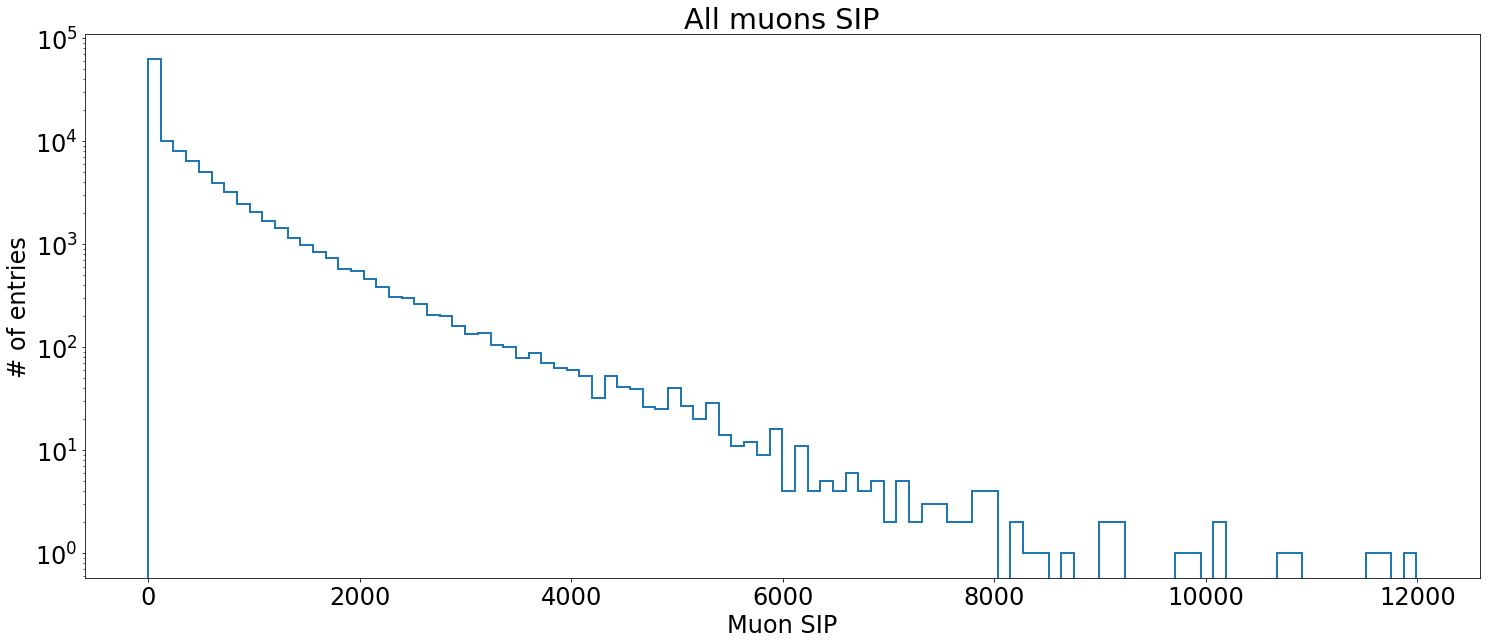

In [65]:
# bins = np.linspace(0, 1000, 100)
plt.figure(figsize = (25,10))
plt.hist(df['mu_sip'], bins = 100, histtype = 'step', linewidth = 2)
plt.yscale('log')
plt.title('All muons SIP')
plt.ylabel('# of entries')
plt.xlabel('Muon SIP')

Text(0.5,0,'Muon SIP')

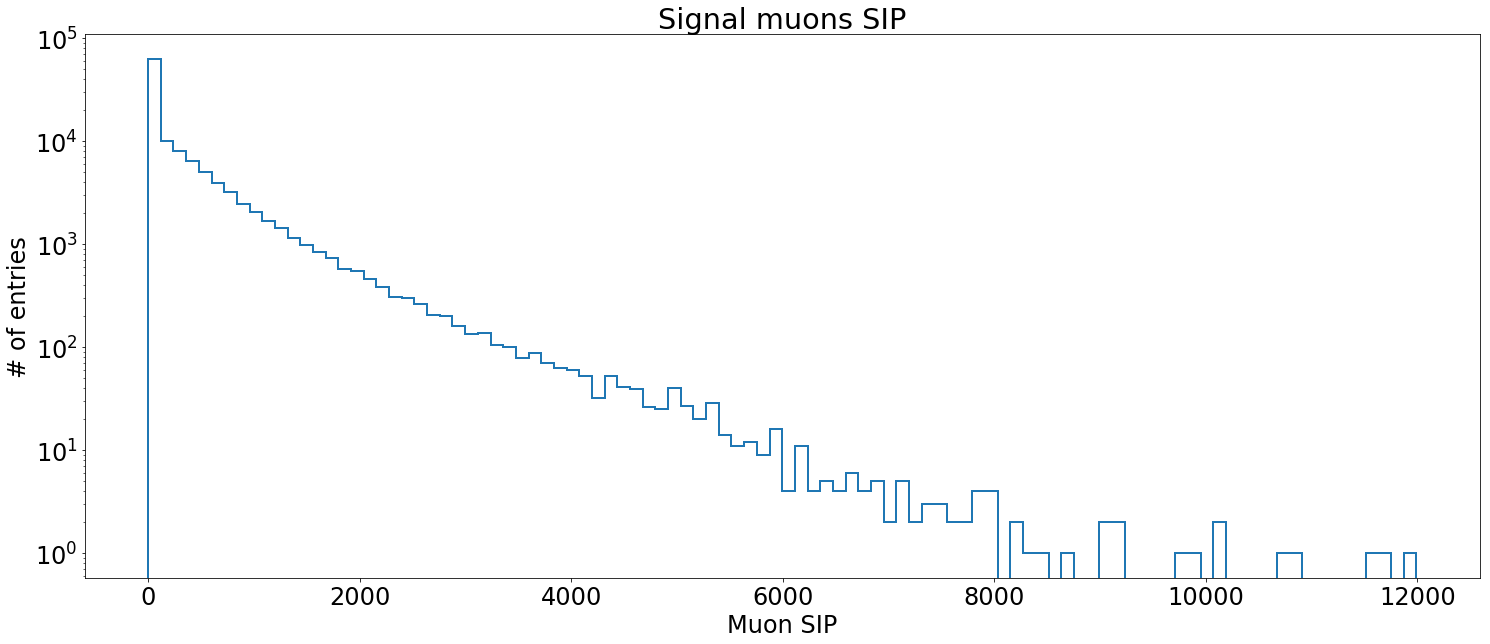

In [66]:
plt.figure(figsize = (25,10))
plt.hist(df['mu_sip'], bins = 100, histtype = 'step', linewidth = 2)
plt.title('Signal muons SIP')
plt.yscale('log')
plt.ylabel('# of entries')
plt.xlabel('Muon SIP')

Text(0.5,0,'Muon SIP')

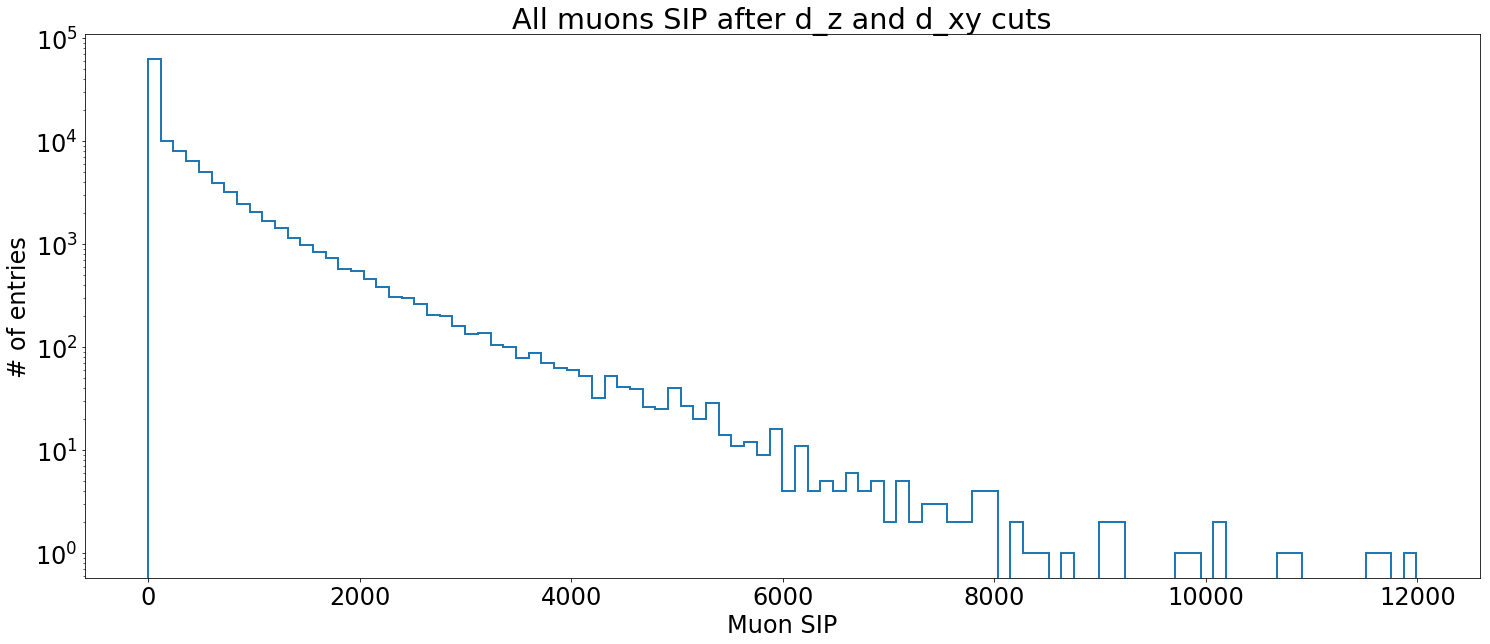

In [67]:
plt.figure(figsize = (25,10))
plt.hist(df['mu_sip'], bins = 100, histtype = 'step', linewidth = 2)
plt.yscale('log')
plt.title('All muons SIP after d_z and d_xy cuts')
plt.ylabel('# of entries')
plt.xlabel('Muon SIP')

Text(0.5,0,'Muon SIP')

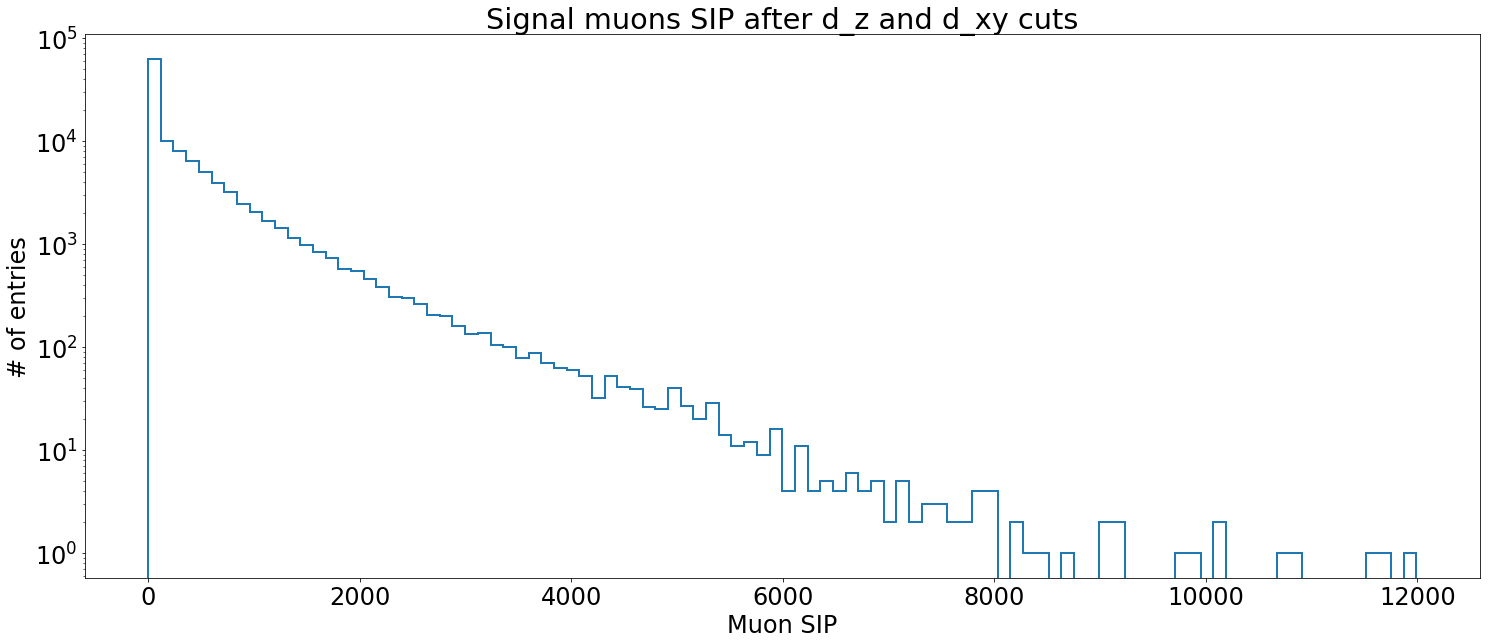

In [68]:
plt.figure(figsize = (25,10))
plt.hist(df['mu_sip'], bins = 100, histtype = 'step', linewidth = 2)
plt.yscale('log')
plt.title('Signal muons SIP after d_z and d_xy cuts')
plt.ylabel('# of entries')
plt.xlabel('Muon SIP')

Efficiencies

In [29]:
print len(df_signal.query('mu_sip < 4'))*1./len(df_signal)*100

50.3212541763


In [30]:
print len(df_signal_dxy_dz.query('mu_sip < 4'))*1./len(df_signal_dxy_dz)*100

85.0409479003


In [31]:
print len(df_signal.query('mu_sip < 4'))
print len(df_signal)

9790
19455


Text(0,0.5,'Muon POG')

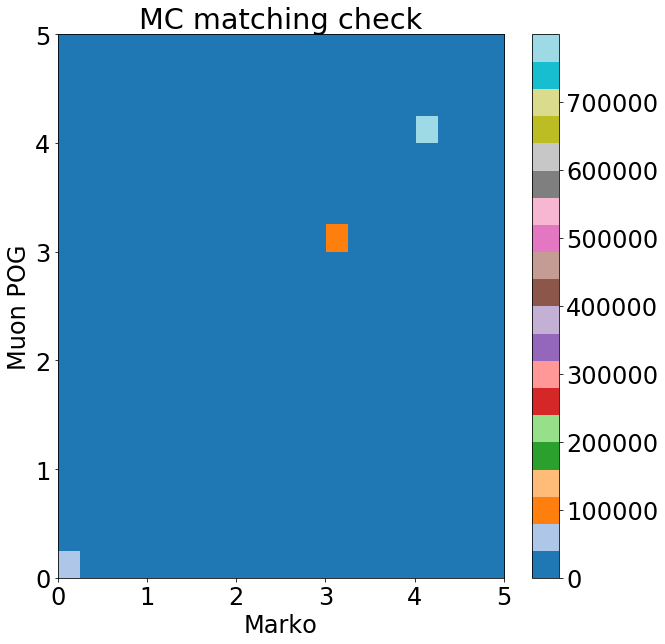

In [59]:
from matplotlib import colors
plt.figure(figsize = (10,10))
plt.hist2d(df['matchedToGenMu_POG_codes'], df['matchedToGenMuPOG'], bins = (20, 20), range = ((0, 5), (0, 5)), cmap = 'tab20')
plt.colorbar()
plt.title('MC matching check')
plt.xlabel('Marko')
plt.ylabel('Muon POG')
